## LOAD DATASET


Import and visualize a sample of our datasets


In [ ]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Paths to dataset
normal_path = 'potholes_detection project\dataset\normal'
potholes_path = 'potholes_detection project\dataset\potholes'

# Function to display sample images
def show_samples(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

# Show samples for both classes
normal_images = glob(os.path.join(normal_path, '*.jpg'))
potholes_images = glob(os.path.join(potholes_path, '*.jpg'))

show_samples(normal_images, 'Normal')
show_samples(potholes_images, 'Potholes')

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [17]:
# import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
import warnings
warnings.filterwarnings('ignore')

# PRE-PROCESSING



In [18]:
# Re-size and normalize each image before appending it on to the list
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalization
    return img

In [19]:
# Load and preprocess images from both classes
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = preprocess_image(img)  # Preprocess the image
            images.append(img)
            labels.append(label)
    return images, labels

normal_images, normal_labels = load_and_preprocess_images('normal', 0)
potholes_images, potholes_labels = load_and_preprocess_images('potholes', 1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'normal'

In [ ]:
# Concatenate data and labels from both classes into single arrays
X = np.array(normal_images + potholes_images)
y = np.array(normal_labels + potholes_labels)

In [ ]:
# Resize and normalize images
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

X_processed = np.array([preprocess_image(img) for img in X])

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

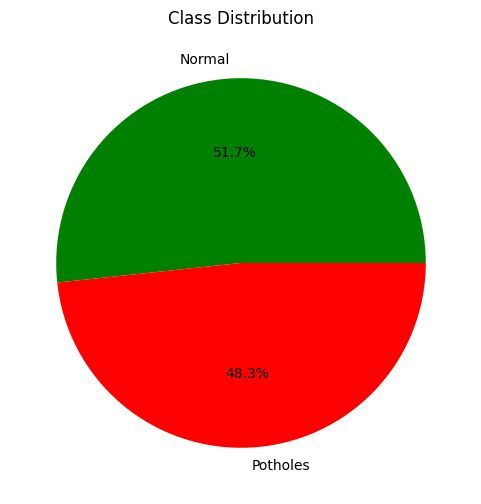

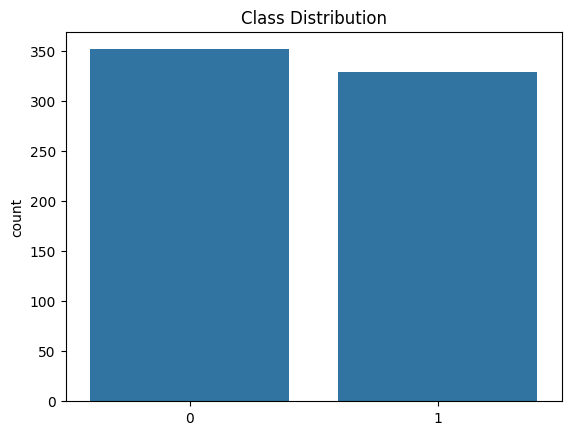

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(6, 6))
plt.pie([np.sum(y == 0), np.sum(y == 1)], labels=['Normal', 'Potholes'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Class Distribution')
plt.show()

# Bar plot for class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

## MODELLING

In [ ]:
# Build a baseline CNN model
baseline_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = baseline_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.4835 - loss: 0.6965 - val_accuracy: 0.3942 - val_loss: 0.6935
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.3942 - val_loss: 0.6934
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.4651 - loss: 0.6932 - val_accuracy: 0.3942 - val_loss: 0.6932
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.5055 - loss: 0.6933 - val_accuracy: 0.3942 - val_loss: 0.6941
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6939
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6939
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6940
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.

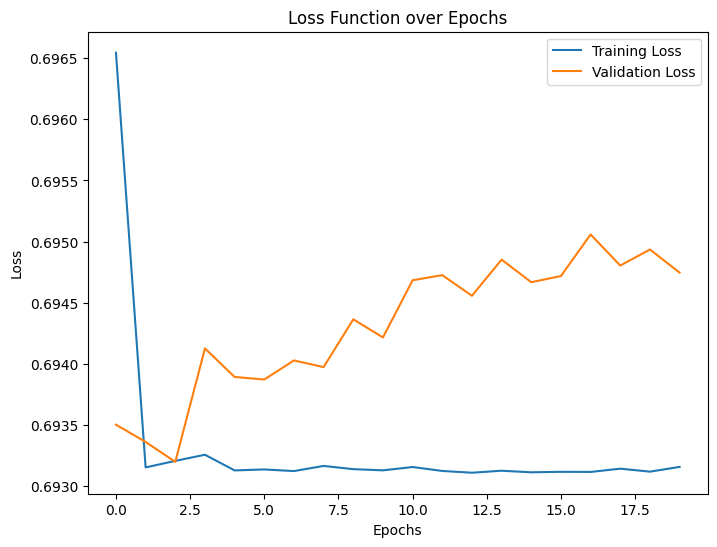

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

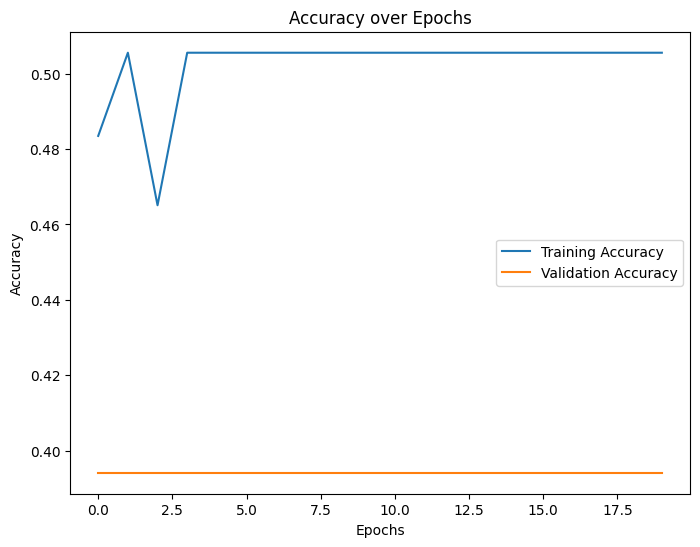

In [ ]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Transfer Leaning Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, DenseNet121, MobileNetV2, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
normal_path = 'potholes_detection project\dataset\normal'
potholes_path = 'potholes_detection project\dataset\potholes'

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('potholes_detection project\dataset',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training')

val_gen = datagen.flow_from_directory('potholes_detection project\dataset',
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation')

# Model list
models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'EfficientNetB0': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'Xception': Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Function to add classification layers and compile models
def build_model(base_model):
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train, evaluate and collect results
results = {}
for name, base_model in models.items():
    print(f"Training {name}")
    model = build_model(base_model)
    
    # Train the model
    history = model.fit(train_gen, validation_data=val_gen, epochs=10)
    
    # Evaluate on validation set
    val_pred = model.predict(val_gen)
    val_pred_labels = (val_pred > 0.5).astype(int)
    y_true = val_gen.classes
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_true, val_pred_labels)
    cr = classification_report(y_true, val_pred_labels, target_names=val_gen.class_indices.keys())
    
    # Store results
    results[name] = {
        'accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='bone')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {name}:\n{cr}")
    print(f"Accuracy: {results[name]['accuracy'] * 100:.2f}%\n")

    # Plot Loss Function Graphs
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Function for {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Compare models' accuracy
accuracies = [results[model]['accuracy'] for model in models]
plt.figure(figsize=(10,6))
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'potholes_detection project\\dataset'